In [1]:
import networkx as nx
import itertools
import matplotlib.pyplot as plt
import math

In [2]:
# Implemented to calculate distance between 2 points by latitude and longitude
def haversine_distance(point1, point2):
    # Assuming points are in the form (latitude, longitude)
    lat1, lon1 = point1
    lat2, lon2 = point2

    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    radius_of_earth = 6371  # Earth radius in kilometers
    distance = radius_of_earth * c

    return distance

In [3]:
def tsp_algorithm(graph, start_point, ordered_points):
    # Ensure that the start point and ordered points are valid nodes in the graph
    assert start_point in graph.nodes(), f"{start_point} is not in the graph"
    assert all(point in graph.nodes() for point in ordered_points), f"{ordered_points} are not in the graph"

    # Create a list of all points to visit (start + ordered)
    points_to_visit = [start_point] + ordered_points

    # Initialize variables to store the best path and its length
    best_path = None
    best_length = float('inf')

    # Iterate through all permutations
    for perm in itertools.permutations(ordered_points):
        total_length = 0
        current_point = start_point

        current_path = []
        for next_point in perm:
            try:
                # Find the shortest path between consecutive points
                path_length = nx.shortest_path_length(graph, source=current_point, target=next_point, weight='weight')
                current_path = current_path + nx.shortest_path(graph, source=current_point, target=next_point, weight='weight')[1:];
                total_length += path_length
                current_point = next_point
            except nx.NetworkXNoPath:
                raise KeyError(f"No path found for {current_point} to {next_point}")

        # Check if it's the best solution so far
        if total_length < best_length:
            best_length = total_length
            best_path = [start_point] + current_path  # Include the starting point in the path

    return best_path, best_length

Optimal TSP Path: ['Street A', 'Street B', 'Street C', 'Street E', 'Street D']
Optimal TSP Length: 31


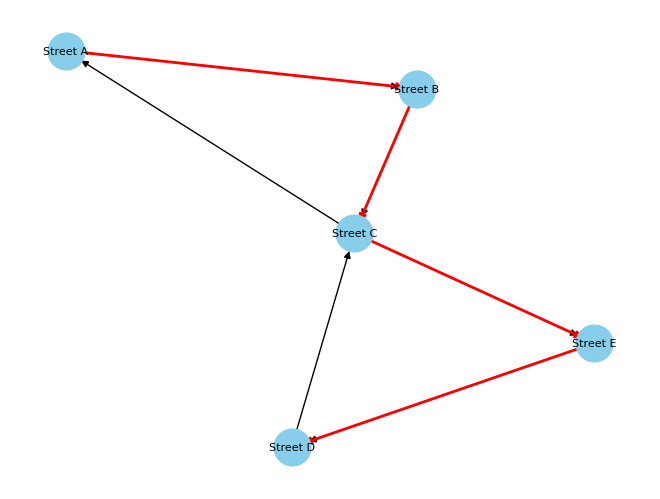

In [4]:
# Example usage
G = nx.DiGraph()

G.add_node("Street A")
G.add_node("Street B")
G.add_node("Street C")
G.add_node("Street D")
G.add_node("Street E")

G.add_edge("Street A", "Street B", weight=5)
G.add_edge("Street B", "Street C", weight=10)
G.add_edge("Street C", "Street E", weight=8)
G.add_edge("Street E", "Street D", weight=8)
G.add_edge("Street C", "Street A", weight=4)
G.add_edge("Street D", "Street C", weight=4)

# Define starting point and ordered points
start_point = "Street A"
ordered_points = ["Street C", "Street D"]

# Find the optimal TSP path with ordered points using the corrected algorithm
optimal_path, optimal_length = tsp_algorithm(G, start_point, ordered_points)

# Print the result
print("Optimal TSP Path:", optimal_path)
print("Optimal TSP Length:", optimal_length)

# Draw the graph with the optimal path highlighted
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black")
nx.draw_networkx_edges(G, pos, edgelist=[(optimal_path[i], optimal_path[i + 1]) for i in range(len(optimal_path) - 1)], edge_color='red', width=2)

# Display the plot
plt.show()